In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

In [3]:
data = load_digits()
data.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [4]:
print(data.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [5]:
X =data.data
X.shape

(1797, 64)

In [6]:
y =data.target
y.shape

(1797,)

In [7]:
X_train,X_test,y_train,y_test = train_test_split?

In [ ]:
X_train,X_test,y_train,y_test = train_test_split

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 666)

### 使用KNN进行分类

In [9]:
knncls = KNeighborsClassifier()

In [51]:
%timeit knncls.fit(X_train,y_train)

3.99 ms ± 109 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [11]:
knncls.score(X_test,y_test)

0.98888888888888893

### 对数据的特征进行降维（将64维 降到2维）

In [12]:
pca = PCA(n_components=2)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [13]:
X_train_decompositon = pca.transform(X_train)
X_test_decompositon = pca.transform(X_test)

In [15]:
X_train_decompositon.shape

(1437, 2)

In [18]:
knncls.fit(X_train_decompositon,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### 随便感觉都知道准确度肯定会下降

In [19]:
knncls.score(X_test_decompositon,y_test)

0.60555555555555551

In [20]:
pca.explained_variance_ratio_

array([ 0.1450646 ,  0.13714246])

### 求出每个特征的解释率

In [28]:
pca = PCA(n_components=X.shape[1])
pca.fit(X)
pca.explained_variance_ratio_

array([  1.48905936e-01,   1.36187712e-01,   1.17945938e-01,
         8.40997942e-02,   5.78241466e-02,   4.91691032e-02,
         4.31598701e-02,   3.66137258e-02,   3.35324810e-02,
         3.07880621e-02,   2.37234084e-02,   2.27269657e-02,
         1.82186331e-02,   1.77385494e-02,   1.46710109e-02,
         1.40971560e-02,   1.31858920e-02,   1.24813782e-02,
         1.01771796e-02,   9.05617439e-03,   8.89538461e-03,
         7.97123157e-03,   7.67493255e-03,   7.22903569e-03,
         6.95888851e-03,   5.96081458e-03,   5.75614688e-03,
         5.15157582e-03,   4.89539777e-03,   4.28887968e-03,
         3.73606048e-03,   3.53274223e-03,   3.36683986e-03,
         3.28029851e-03,   3.08320884e-03,   2.93778629e-03,
         2.56588609e-03,   2.27742397e-03,   2.22277922e-03,
         2.11430393e-03,   1.89909062e-03,   1.58652907e-03,
         1.51159934e-03,   1.40578764e-03,   1.16622290e-03,
         1.07492521e-03,   9.64053065e-04,   7.74630271e-04,
         5.57211553e-04,

In [23]:
x_plot = [x for x in range(X.shape[1])]

In [29]:
y_plot = [np.sum(pca.explained_variance_ratio_[:x+1]) for x in range(X.shape[1])]

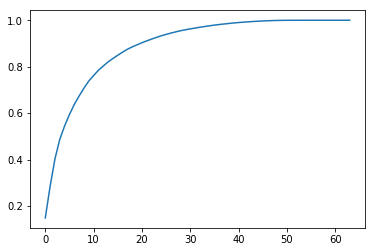

In [30]:
plt.plot(x_plot,y_plot)
plt.show()

从图中观察可以大致看出 将数据降到指定维度 对应的保留率

由此我们 可以设计保留指定百分比的特征的PCA类    （如设定 95% 的来得到对应的最小n_components的值）

### 以下是实现

In [41]:
pca95 = PCA(0.90)

In [42]:
pca95.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [43]:
X_train_des = pca95.transform(X_train)

In [44]:
X_test_des = pca95.transform(X_test)

In [45]:
X_train_des.shape

(1437, 21)

In [52]:
%timeit knncls.fit(X_train_des,y_train)

2.1 ms ± 65.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [47]:
knncls.score(X_test_des,y_test)

0.98611111111111116

## 应用：
### 1.以上就是： 我们通过降维可以牺牲模型的准确度 来提升fit算法的速度



### 2.可视化数据

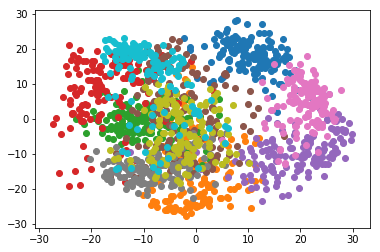

In [58]:
for i in range(10):
    plt.scatter(X_train_decompositon[y_train==i,0],X_train_decompositon[y_train==i,1])
plt.show()